importing libraries

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

specifying Times New Roman font and to force that within plotting commands

In [17]:
tnr = "Times New Roman"
plt.rcParams['font.sans-serif'] = tnr
plt.rcParams['font.family'] = tnr
params ={'mathtext.default':'regular'}          
plt.rcParams.update(params)

uploading files with data to be plotted

In [18]:
ObsID = '640'
lines = ["SXV", "SiXIV", "SiXIII", "MgXII", "MgXI", "NeX_10.24", "NeIX", "NeX_12.13", "FeXVII_15.01", "FeXVII_16.78"]
lp = np.genfromtxt(ObsID+'_parameters.txt')

In [19]:
def lpInfo():
    """get wavelength and taustar values from the best line-profile model"""
    lp_taustar = lp[1:, 1]
    wavelength = lp[1:, 0]
    return lp_taustar, wavelength

def probInfo():
    """returns data: 10 lines probability distribution in 3d array,
    maxtaus: a list of 10 most probable taustar values for each of the 10 lines,
    interpld: a list of interpolations of the 10 probability distribution"""
    data = []
    maxtaus = []
    for i in lines:
        linedata = np.genfromtxt(i+'_Cstats_tau.txt')
        x = linedata[:, 0]
        y = linedata[:, 1]
        maxtau = x[list(y).index(max(y))]
        data.append(linedata)
        maxtaus.append(maxtau)
    return data, maxtaus

In [20]:
def plotHist(x, y1, y2):
    """takes three lists of values and plots in the designed format"""
    plt.figure(figsize = (10, 8))
    plt.xlabel("Wavelength (Å)", fontsize = 27.5)
    plt.ylabel(r'$\tau_{\star}$', fontsize = 27.5)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.locator_params(nbins=6)
    plt.plot(x, y1, "o", color = "r", label = r"line profile best-fit $\tau_{\star}$")
    plt.plot(x, y2, "o", color = "k", label = r"$\tau_{\star}$ with maximum probability")
    plt.figtext(0.15,0.69, 'ObsID: '+str(ObsID), fontsize = 23)
    plt.legend(loc = "best", fontsize = 20)
    plt.savefig("taustar_comparison.png", bbox_inches = 'tight')
    plt.show()

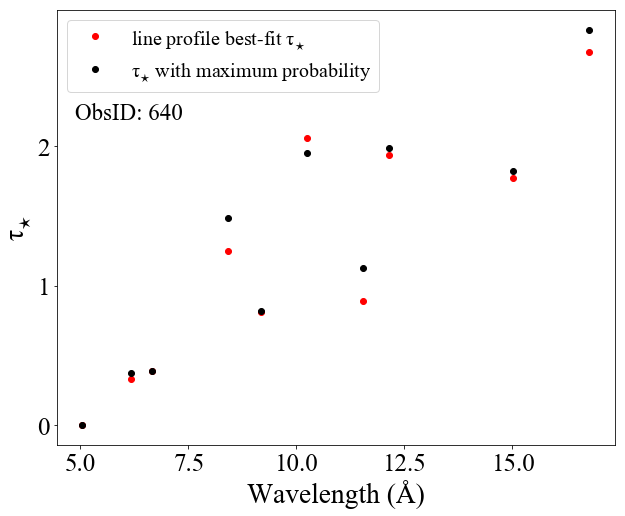

In [21]:
lp_taustar, wavelength = lpInfo()
mp_taustar = probInfo()[1]
plotHist(wavelength, lp_taustar, mp_taustar)